In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import display, clear_output
import torch
import os

In [23]:
loss_optimal = 0.5957541465759277 #declaring for contour plots
np.random.seed(45)
num_samples = 40

# Generate data
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3*x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps

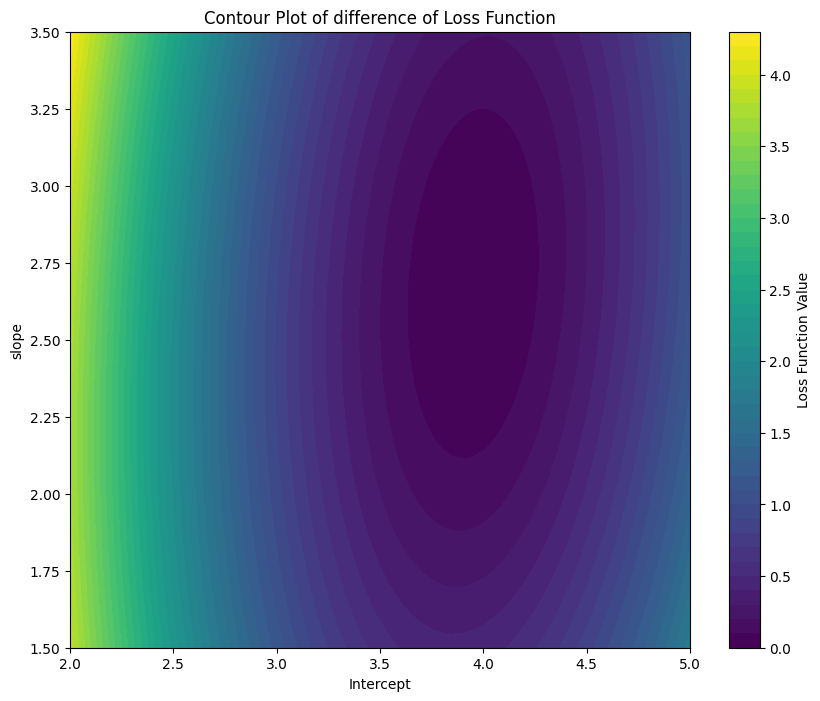

In [24]:

slope_range = np.linspace(1.5,3.5, 100) #theta1
intercept_range = np.linspace(2,5, 100) #theta0
slope, INTERCEPT = np.meshgrid(slope_range, intercept_range)

loss_grid = np.zeros(slope.shape)

for i in range(slope.shape[0]):
    for j in range(slope.shape[1]):
        slope_ij = slope[i, j]
        intercept_ij = INTERCEPT[i, j]
        loss_grid[i, j] = ((y - x1 * slope_ij - intercept_ij) ** 2).mean() - loss_optimal

plt.figure(figsize=(10, 8))
contour = plt.contourf(INTERCEPT, slope, loss_grid, levels=50, cmap='viridis')
plt.colorbar(contour, label='Loss Function Value')
plt.xlabel('Intercept')
plt.ylabel('slope')
plt.title('Contour Plot of difference of Loss Function')
plt.show()


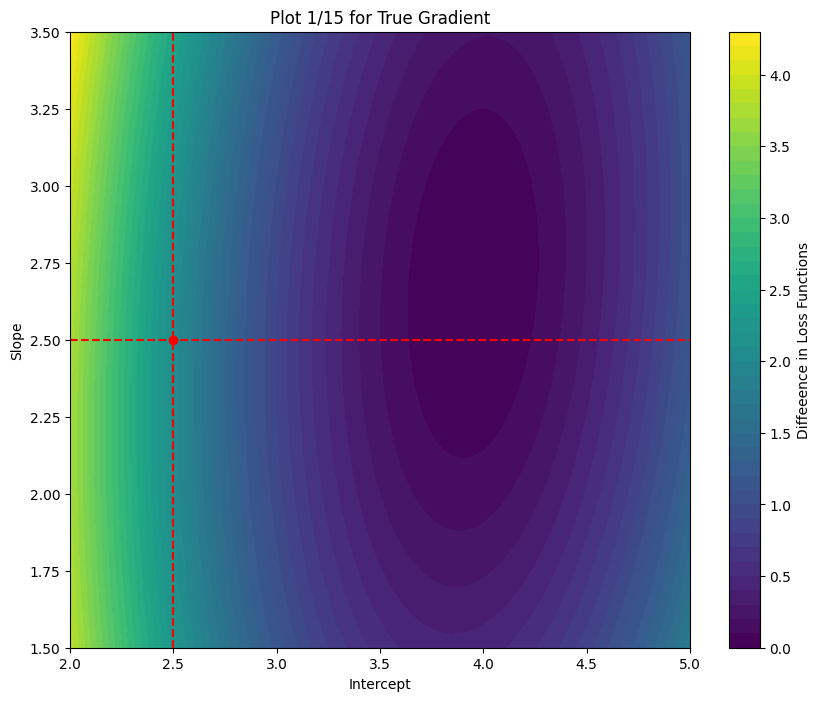

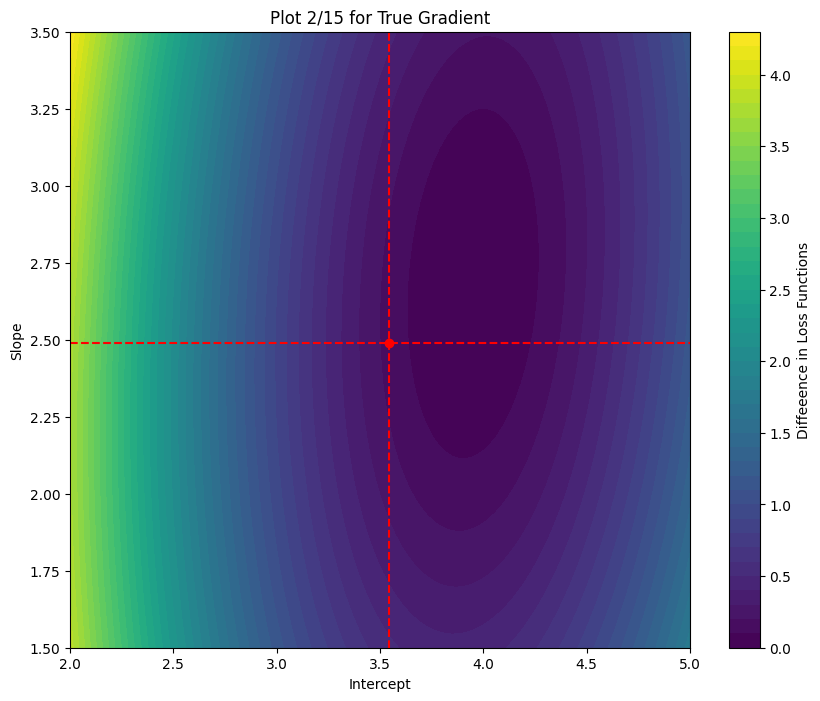

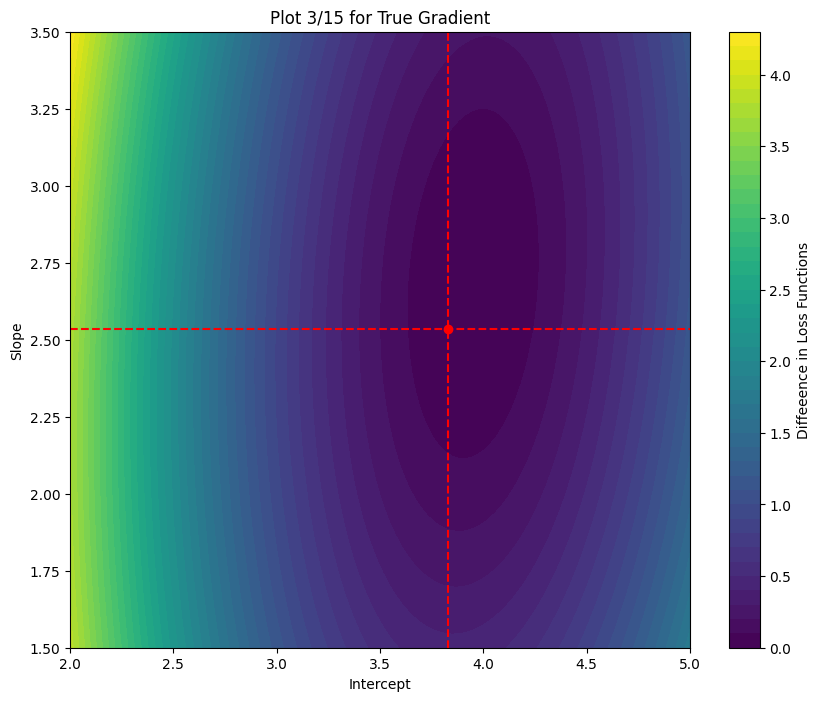

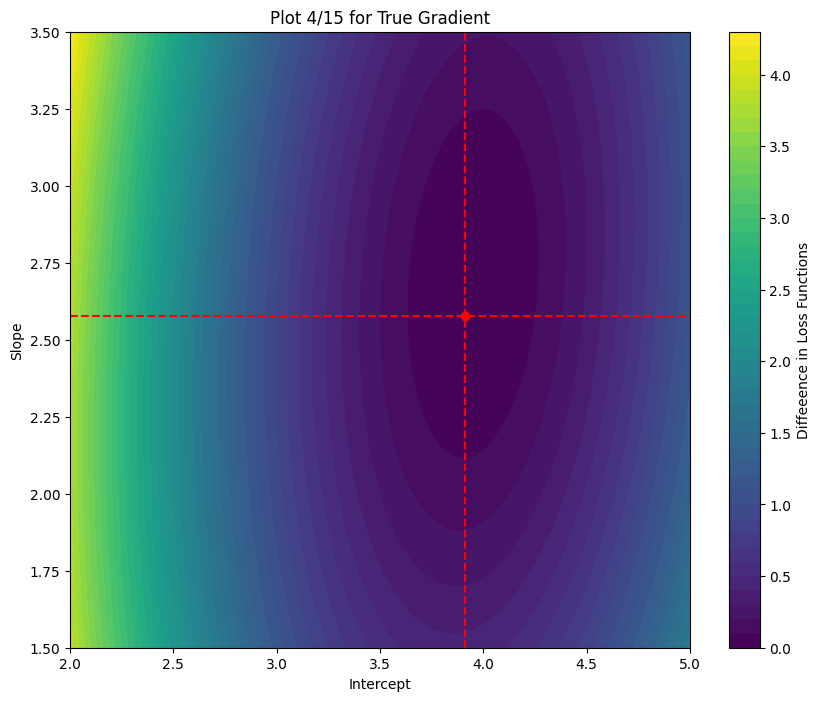

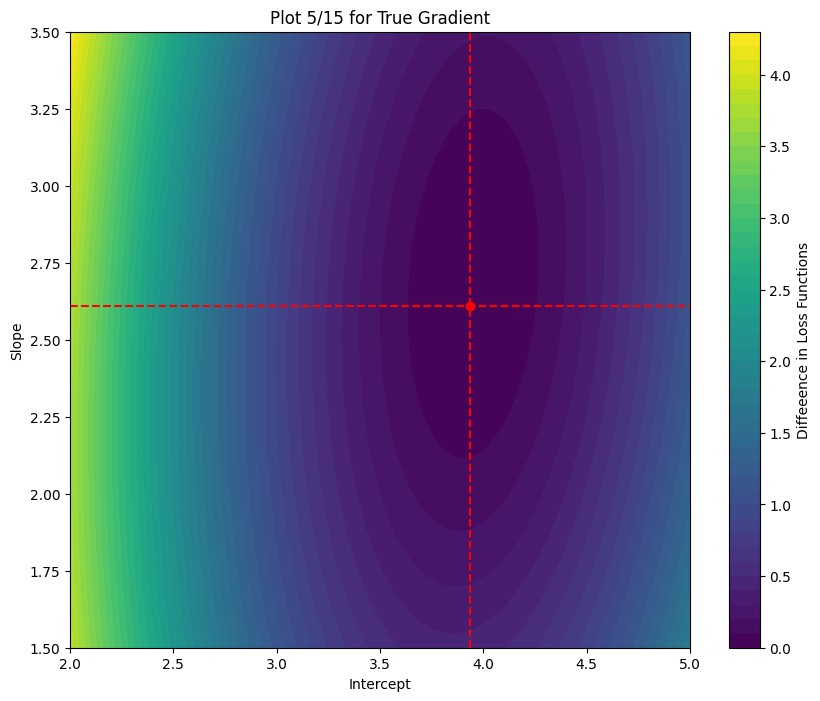

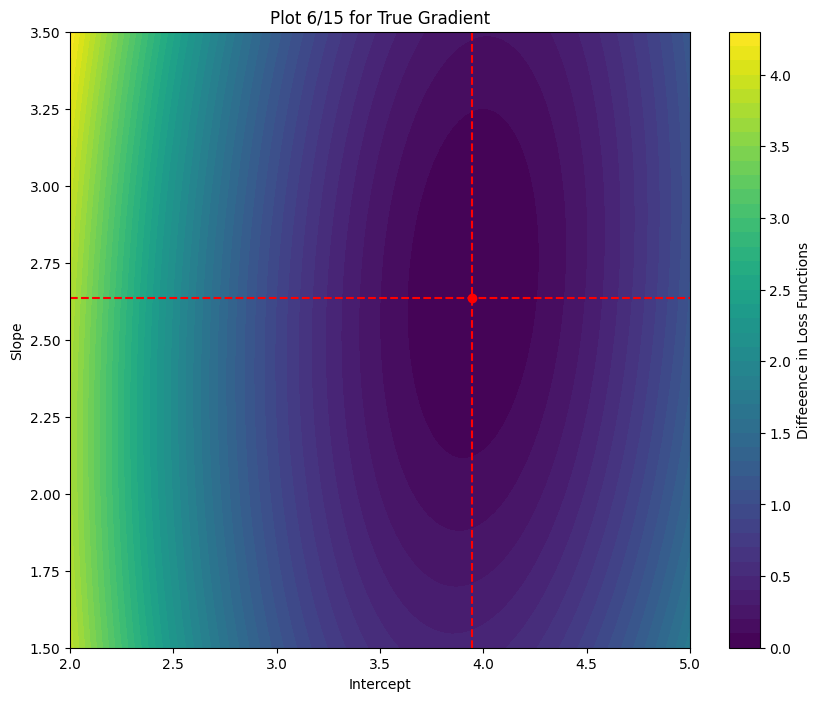

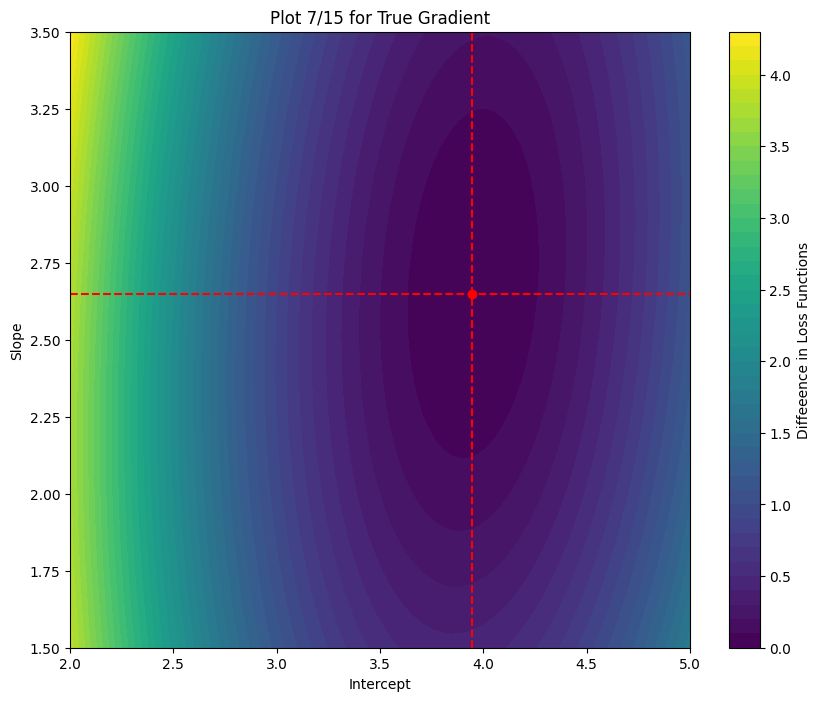

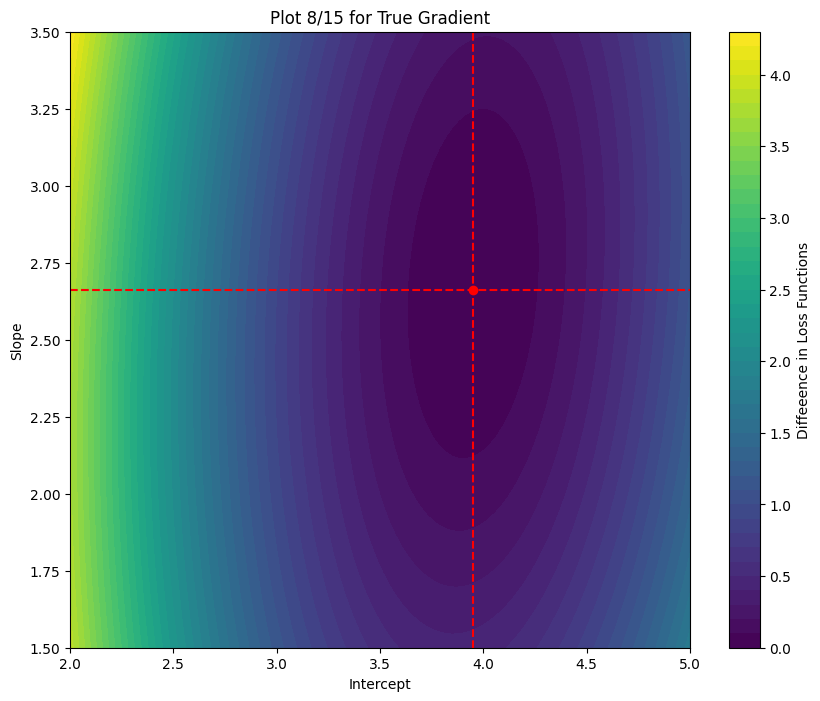

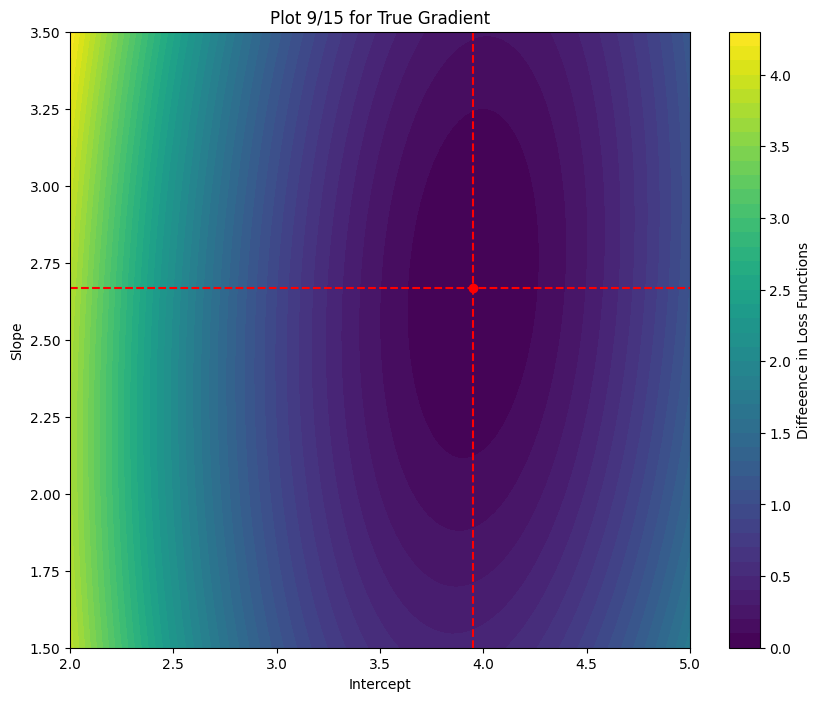

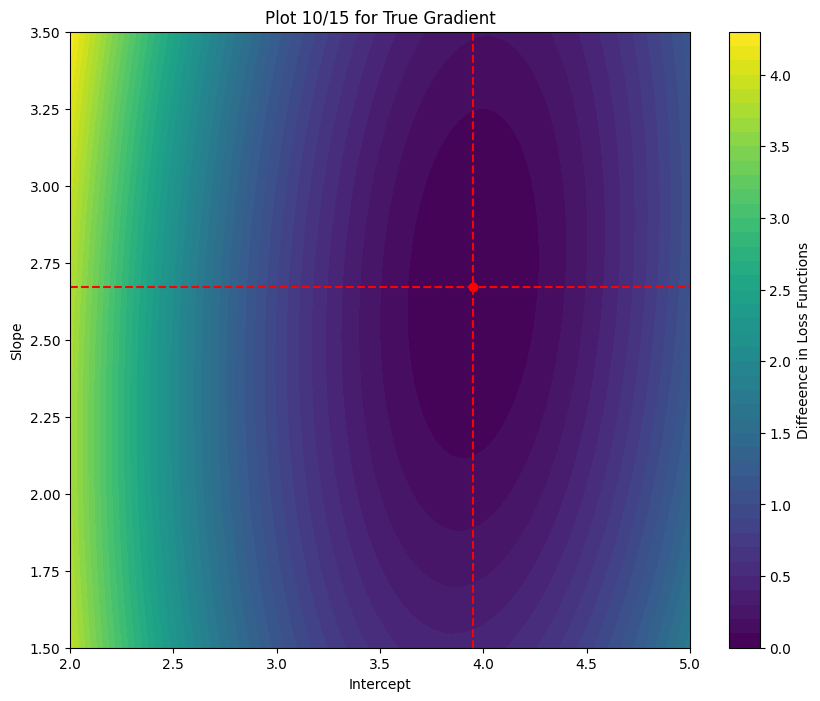

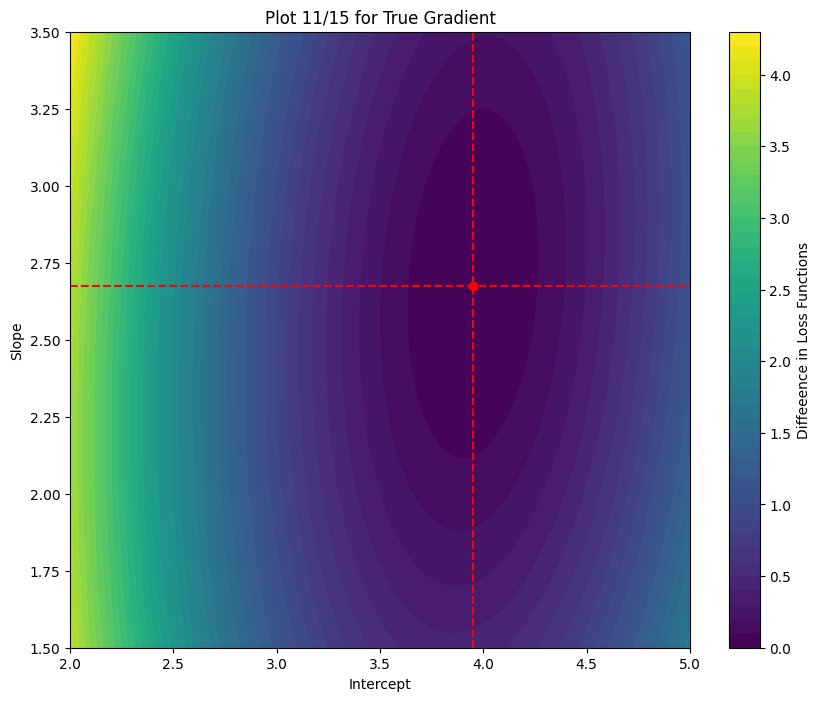

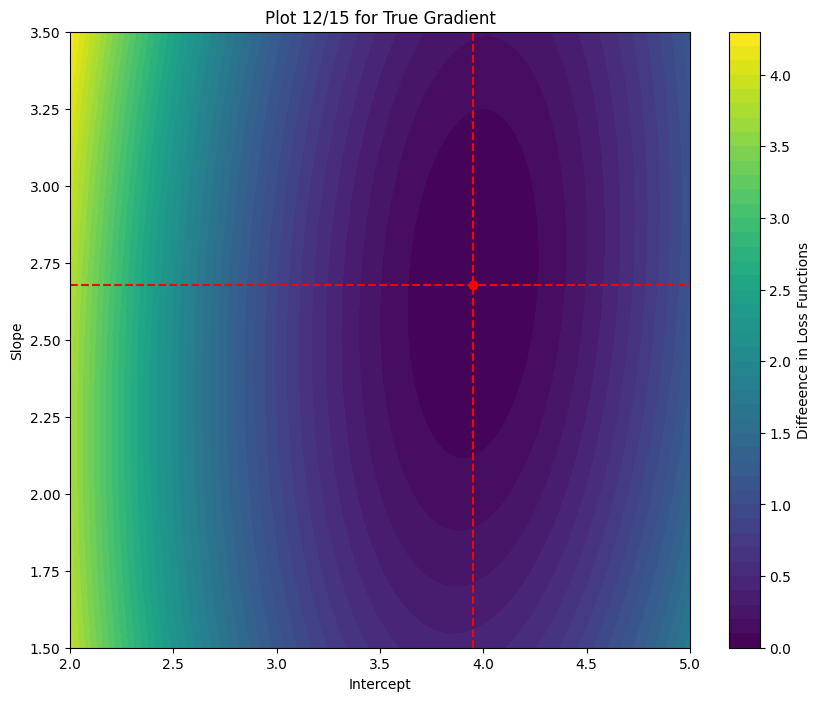

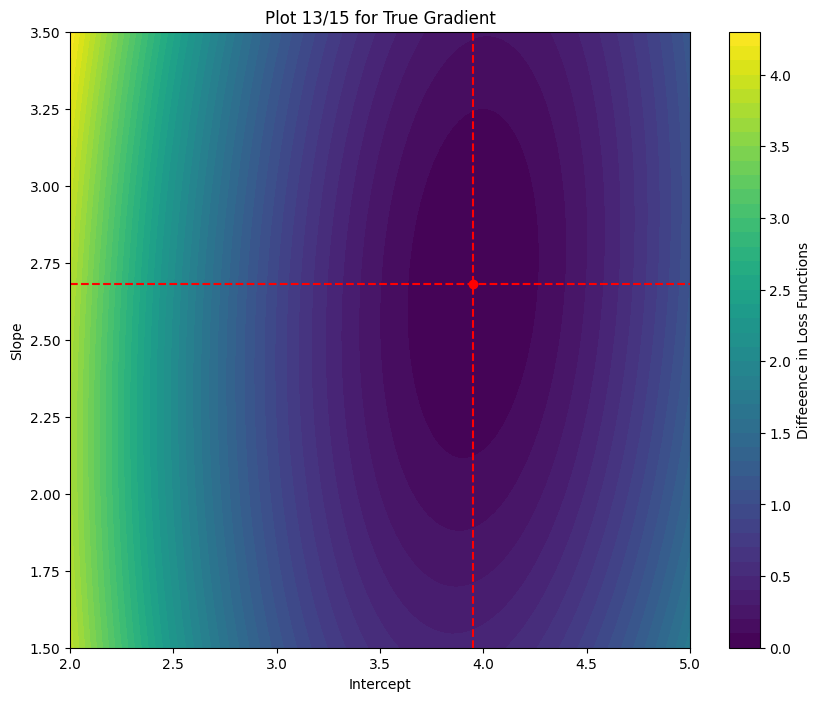

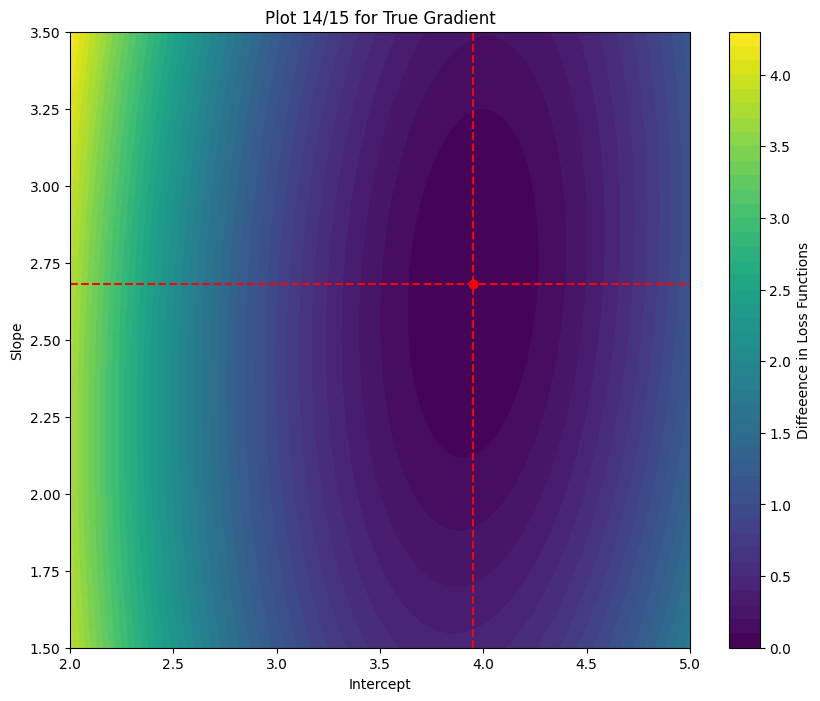

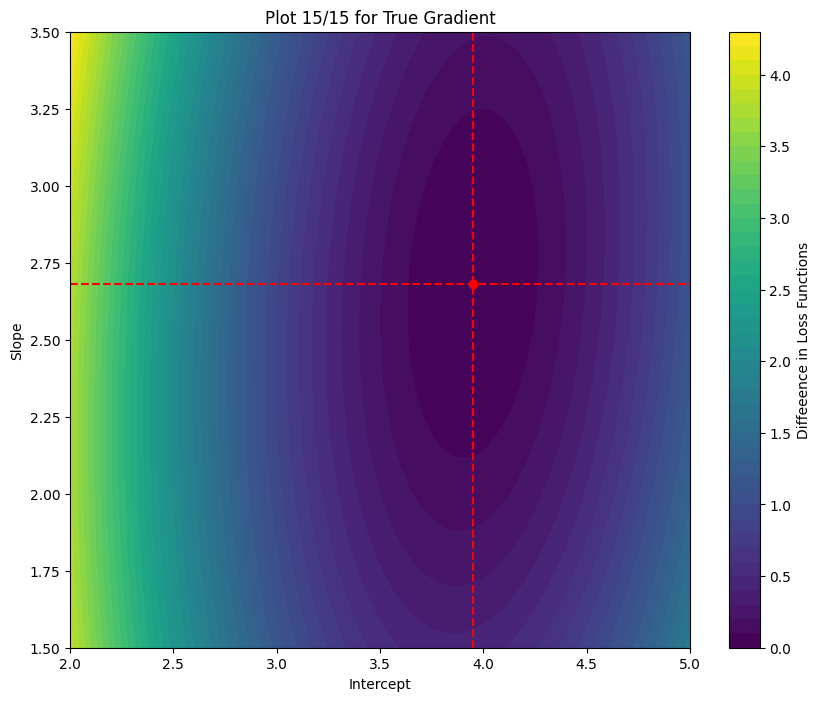

In [25]:
csv_file_path = 'processed_data.csv'
df_csv = pd.read_csv(csv_file_path)


theta0_list = df_csv['val_theta0'].values
theta1_list = df_csv['val_theta1'].values
loss_list = df_csv['loss_values'].values

iterations = 15
len_data = len(theta0_list)
val_skip = len_data // iterations

theta0_vals = []
theta1_vals = []

for a in range(iterations):

    plt.figure(figsize=(10, 8))
    contour = plt.contourf(INTERCEPT, slope, loss_grid, levels=50, cmap='viridis')
    plt.colorbar(contour, label="Diffence in Loss Functions")
    plt.xlabel('Intercept')
    plt.ylabel('Slope')
    plt.title('Contour Plot of difference of Loss Function')

    theta0 = theta0_list[a*val_skip]
    theta1 = theta1_list[a*val_skip]

    theta0_vals.append(theta0)
    theta1_vals.append(theta1)

    plt.plot(theta0, theta1, 'ro')
    plt.title(f'Plot {a+1}/{iterations} for True Gradient')


    plt.axhline(y=theta1, color='red', linestyle='--')
    plt.axvline(x=theta0, color='red', linestyle='--')

    display(plt.gcf())
    clear_output(wait=True)
    time.sleep(0.3)

plt.show()

In [36]:
iterations = 200
len_data = len(theta0_list)
val_skip = len_data // iterations

theta0_vals = []
theta1_vals = []

save_dir = '/Users/tejasmacipad/Desktop/Second_yr/Machine_Learning/es335-24-fall-assignment-2/Plot_figures/PLOT_FBNM'

for a in range(iterations):
    plt.figure(figsize=(10, 8))
    contour = plt.contourf(INTERCEPT, slope, loss_grid, levels=50, cmap='viridis')
    plt.colorbar(contour, label="Difference in Loss Functions")
    plt.xlabel('Intercept')
    plt.ylabel('Slope')
    plt.title('Contour Plot of difference of Loss Function')

    theta0 = theta0_list[a * val_skip]
    theta1 = theta1_list[a * val_skip]

    theta0_vals.append(theta0)
    theta1_vals.append(theta1)

    plt.plot(theta0, theta1, 'ro')
    plt.title(f'Plot {a + 1}/{iterations} for True Gradient')

    plt.axhline(y=theta1, color='red', linestyle='--')
    plt.axvline(x=theta0, color='red', linestyle='--')

    image_path = os.path.join(save_dir, f'plot_{a + 1}.png')
    plt.savefig(image_path)

    
    plt.close()

print(f'All plots saved to {save_dir}')

All plots saved to /Users/tejasmacipad/Desktop/Second_yr/Machine_Learning/es335-24-fall-assignment-2/Plot_figures/PLOT_FBNM


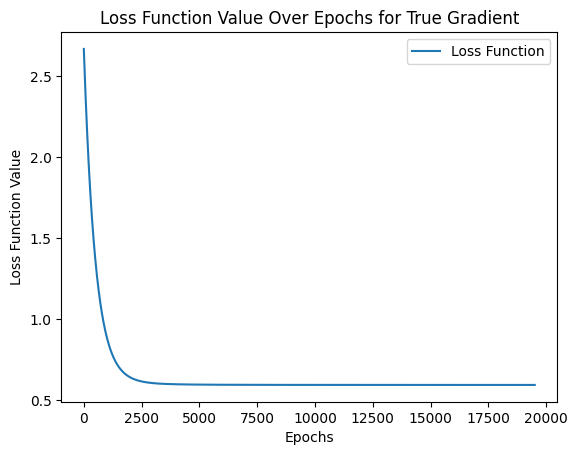

In [26]:
x_plot_val = np.linspace(1, len(loss_list[1:]), len(loss_list[1:]))
plt.plot(x_plot_val, loss_list[1:], label='Loss Function')
plt.xlabel('Epochs')
plt.ylabel('Loss Function Value')
plt.title('Loss Function Value Over Epochs for True Gradient')
plt.legend()
plt.show()

plotting the loss vs epoch for the first 15 values

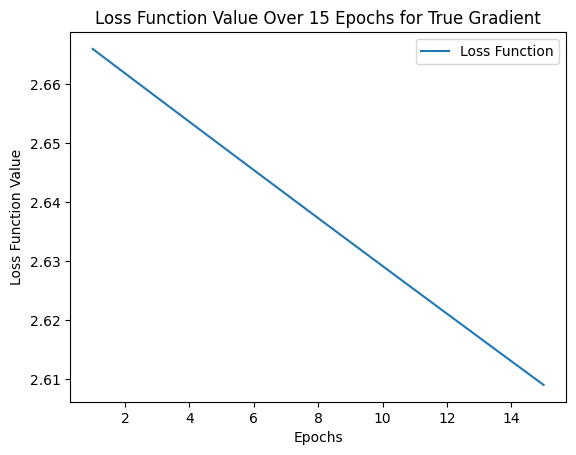

In [27]:
x_plot_val = np.linspace(1, len(loss_list[1:16]), len(loss_list[1:16]))
plt.plot(x_plot_val, loss_list[1:16], label='Loss Function')
plt.xlabel('Epochs')
plt.ylabel('Loss Function Value')
plt.title('Loss Function Value Over 15 Epochs for True Gradient')
plt.legend()
plt.show()

Visalization and Animation of Stochastic Gradient Descent.

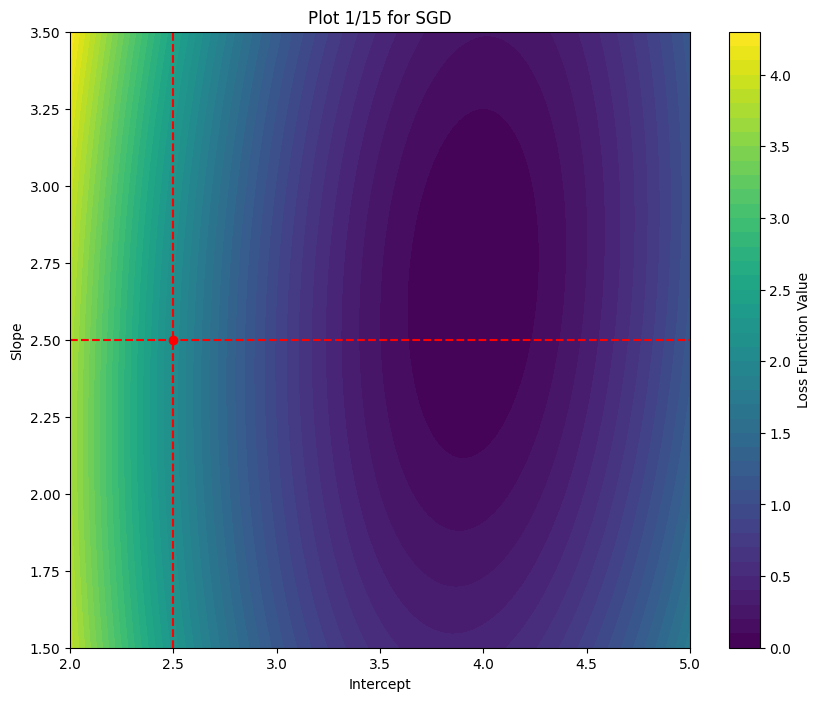

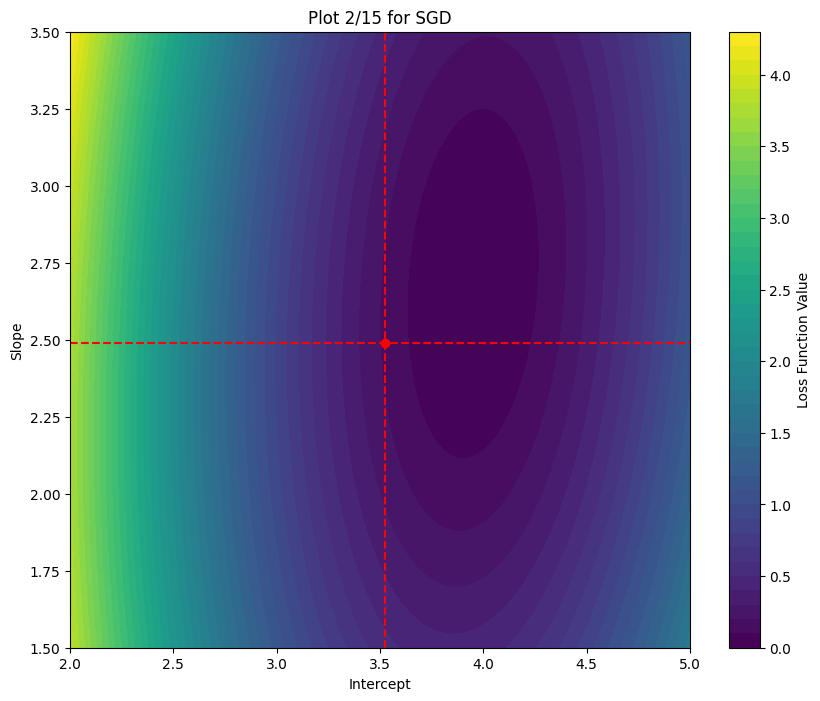

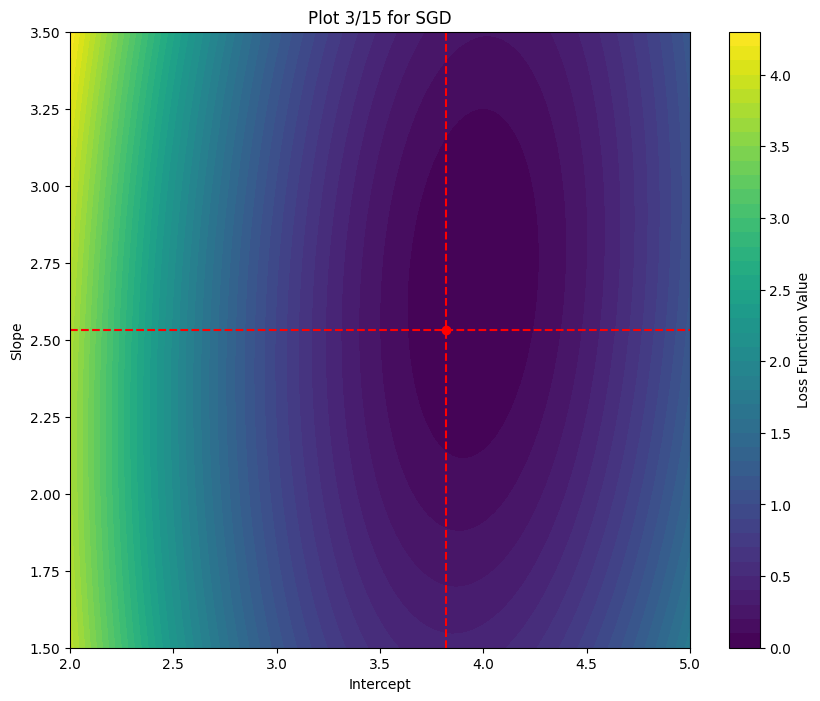

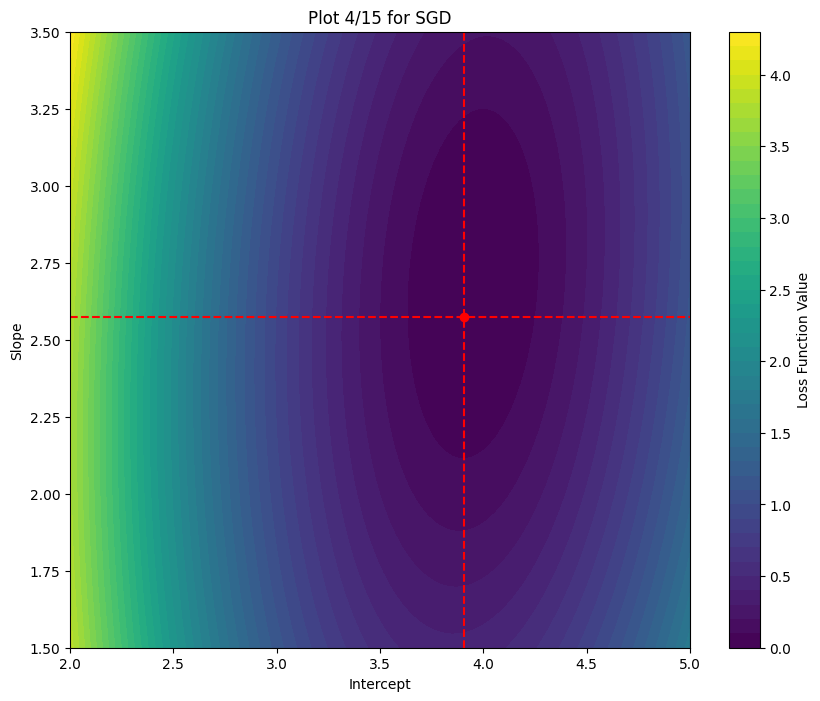

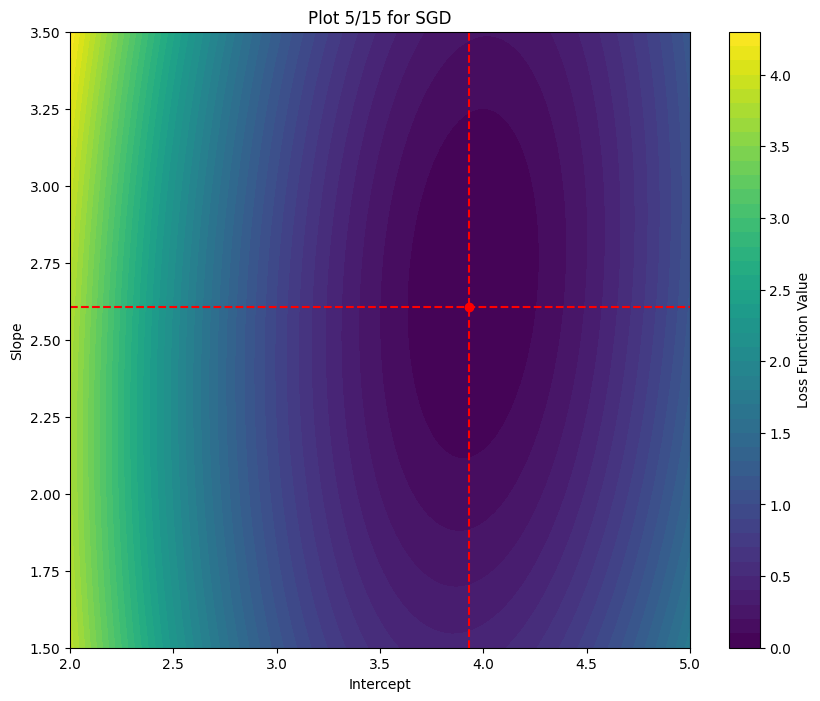

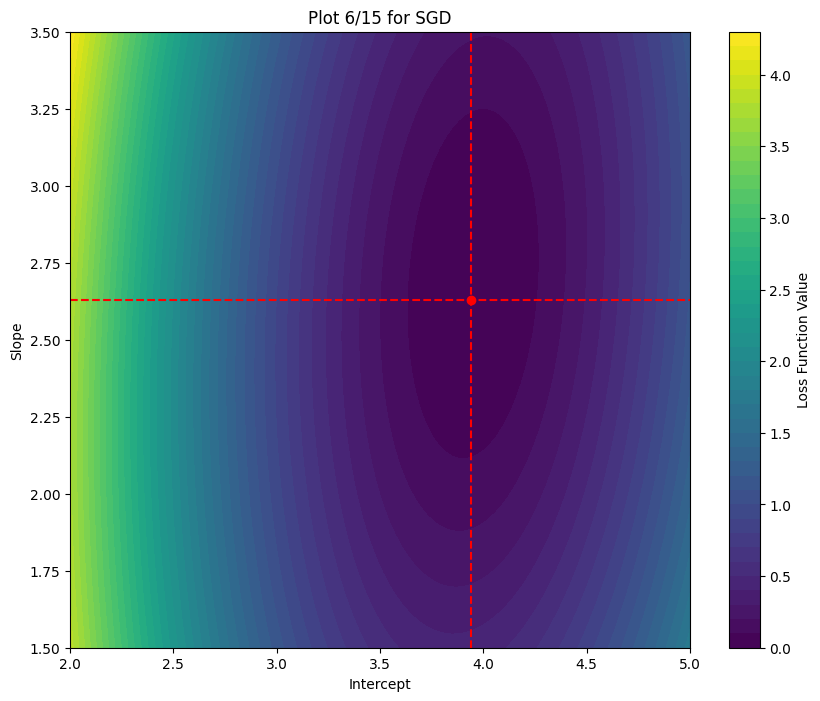

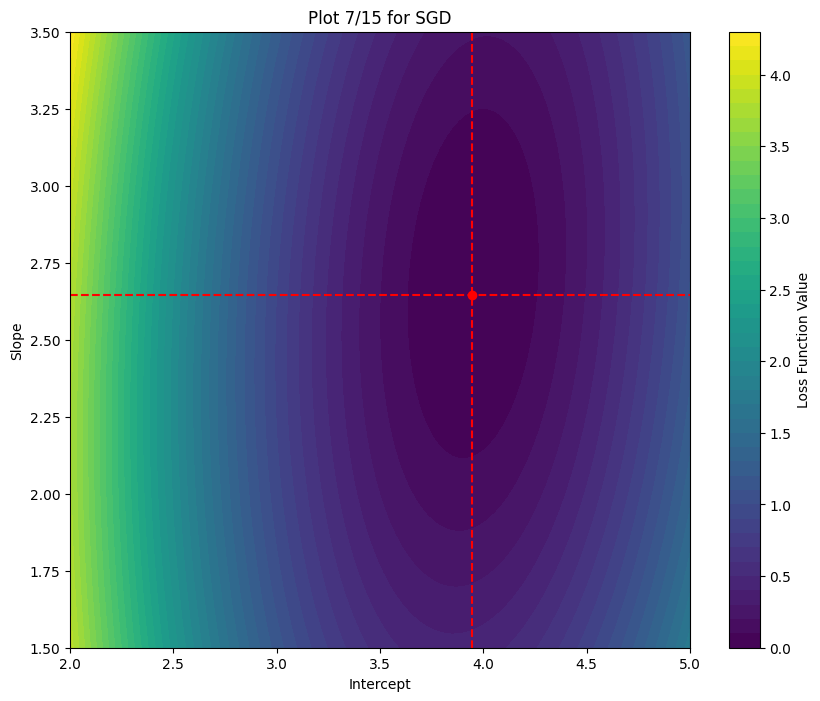

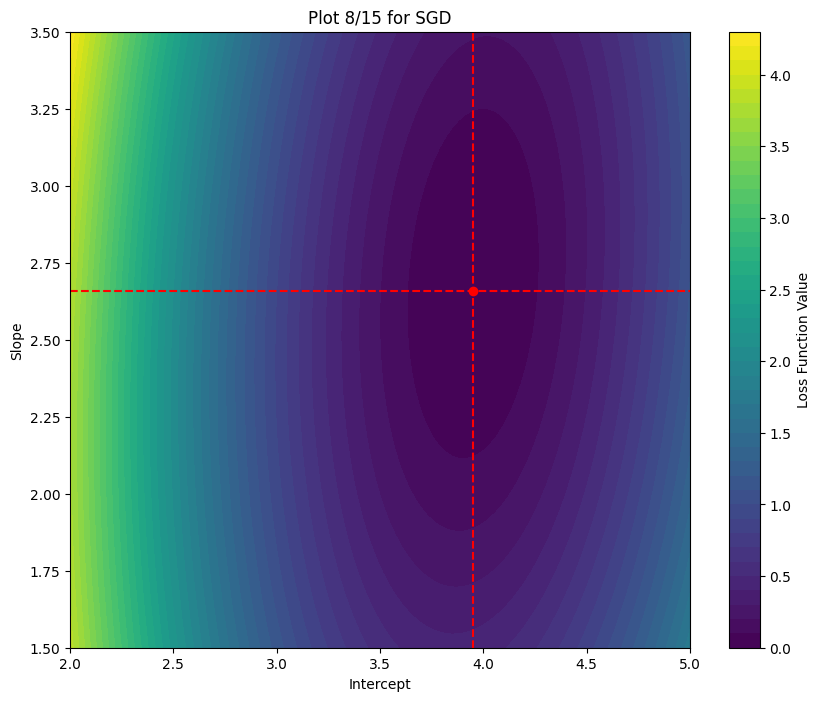

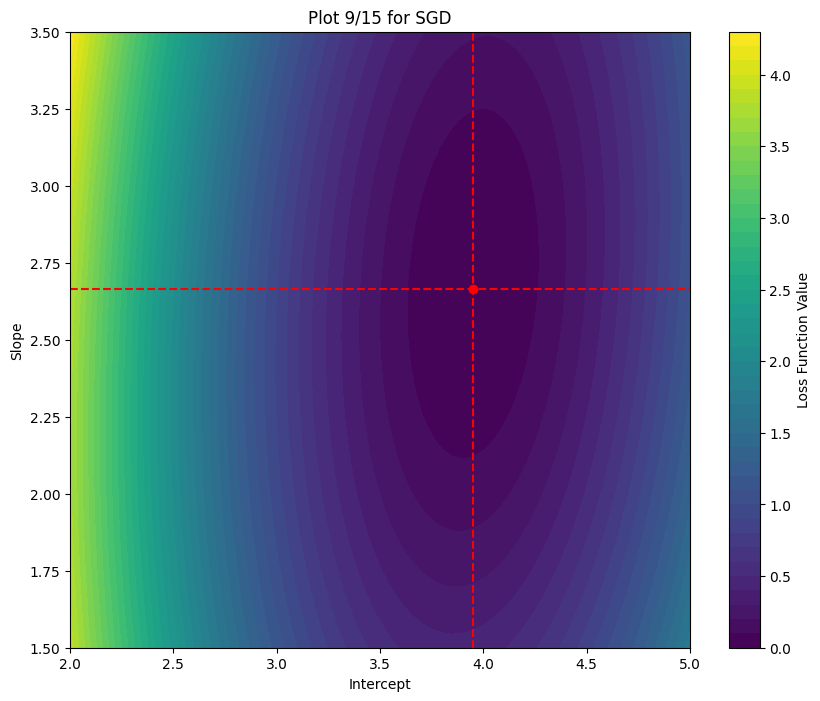

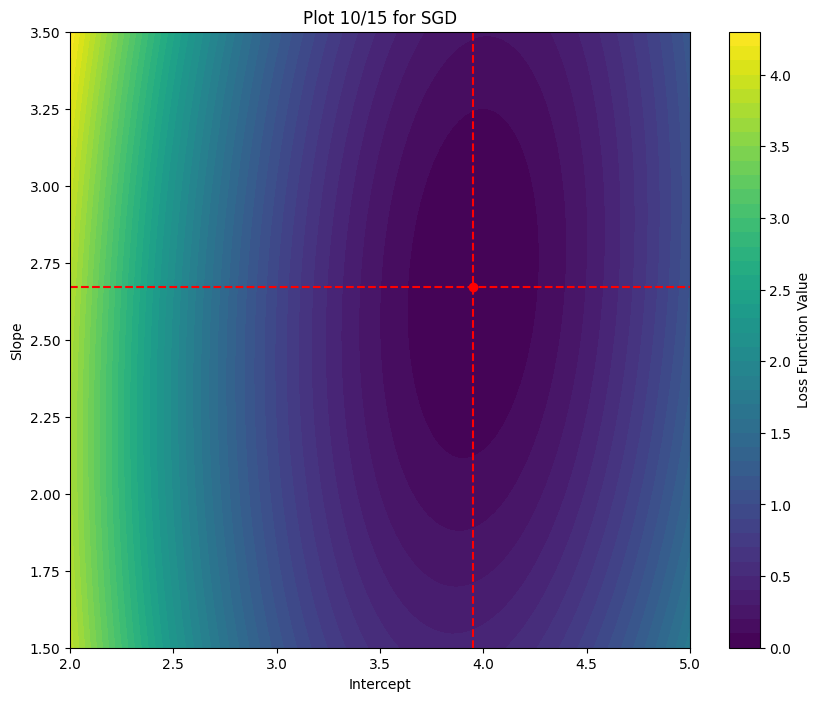

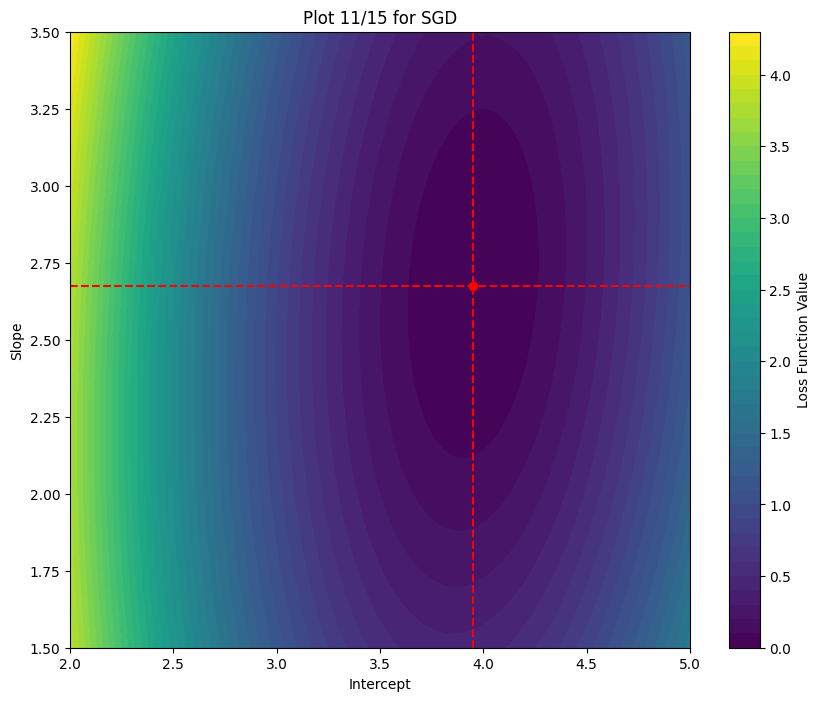

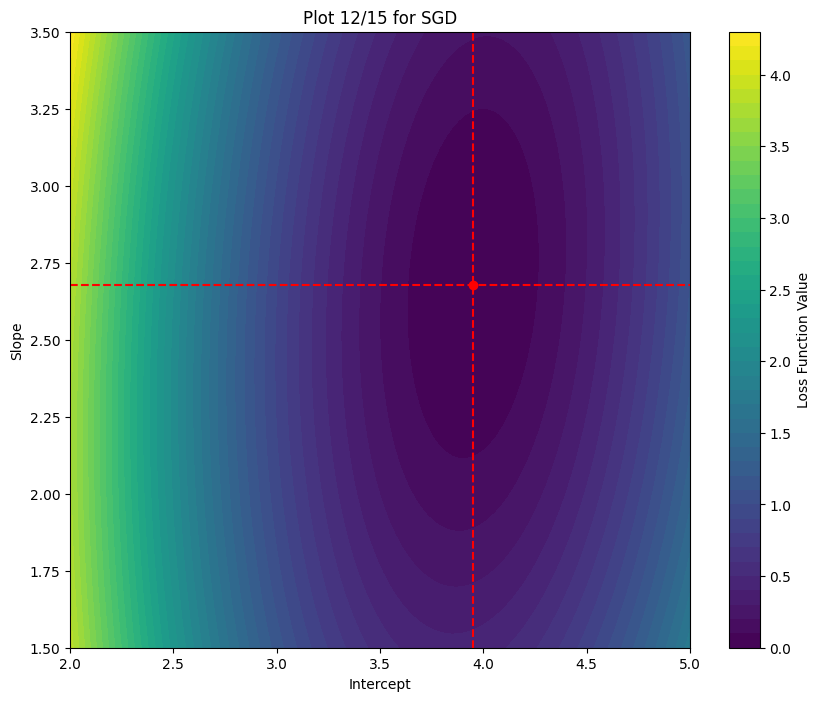

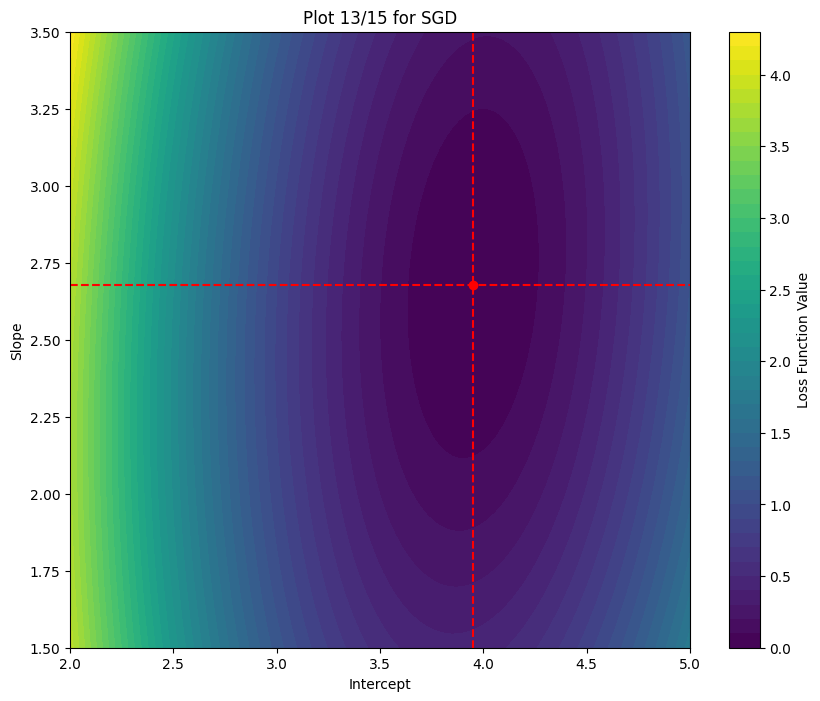

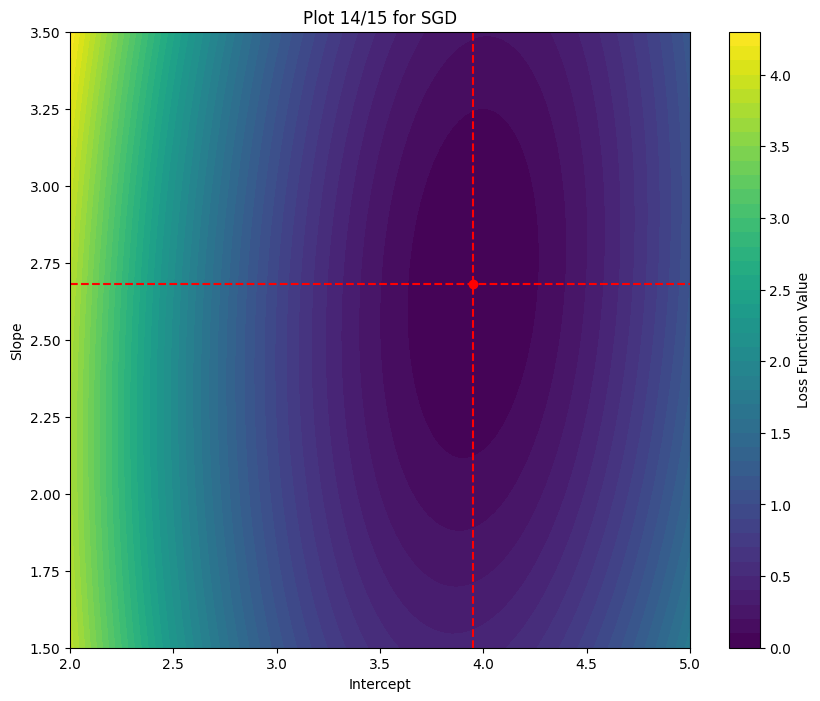

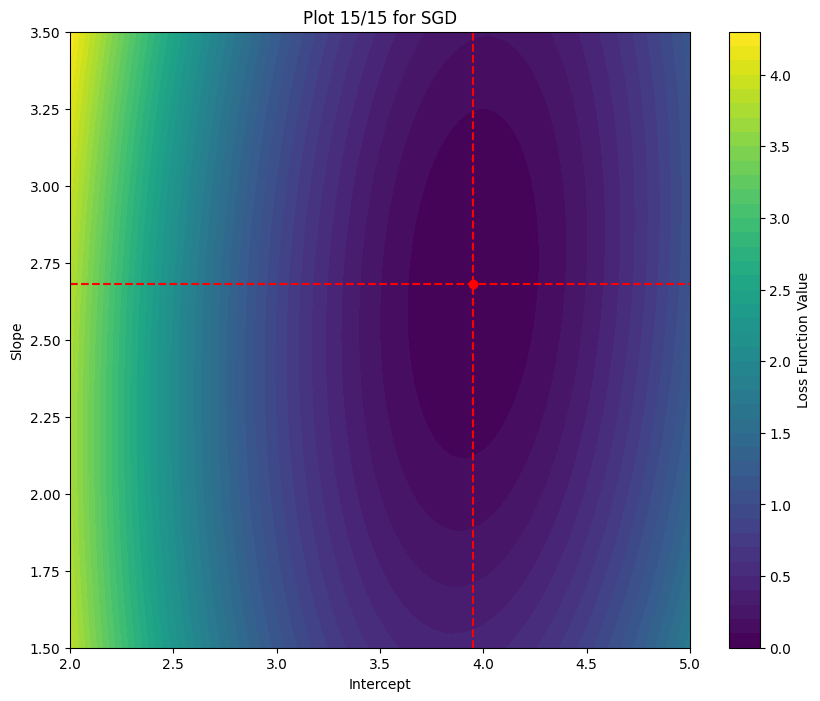

In [28]:
csv_file_path = 'processed_data_sgd.csv'
df_csv = pd.read_csv(csv_file_path)


theta0_list = df_csv['val_theta0_sgd'].values
theta1_list = df_csv['val_theta1_sgd'].values
loss_list_sgd = df_csv['loss_values_sgd'].values

iterations = 15
len_data = len(theta0_list)
val_skip = len_data // iterations

theta0_vals = []
theta1_vals = []

for a in range(iterations):

    plt.figure(figsize=(10, 8))
    contour = plt.contourf(INTERCEPT, slope, loss_grid, levels=50, cmap='viridis')
    plt.colorbar(contour, label='Loss Function Value')
    plt.xlabel('Intercept')
    plt.ylabel('Slope')
    plt.title('Contour Plot of difference of Loss Function')

    theta0 = theta0_list[a*val_skip]
    theta1 = theta1_list[a*val_skip]

    theta0_vals.append(theta0)
    theta1_vals.append(theta1)

    plt.plot(theta0, theta1, 'ro')
    plt.title(f'Plot {a+1}/{iterations} for SGD')


    plt.axhline(y=theta1, color='red', linestyle='--')
    plt.axvline(x=theta0, color='red', linestyle='--')

    display(plt.gcf())
    clear_output(wait=True)
    time.sleep(0.4)

# Show the final plot (optional)
plt.show()

Saving the Images for the animation

In [39]:
csv_file_path = 'processed_data_sgd.csv'
df_csv = pd.read_csv(csv_file_path)


theta0_list = df_csv['val_theta0_sgd'].values
theta1_list = df_csv['val_theta1_sgd'].values
loss_list_sgd = df_csv['loss_values_sgd'].values

iterations = 15
len_data = len(theta0_list)
val_skip = len_data // iterations

iterations = 200
len_data = len(theta0_list)
val_skip = len_data // iterations

theta0_vals = []
theta1_vals = []


save_dir = '/Users/tejasmacipad/Desktop/Second_yr/Machine_Learning/es335-24-fall-assignment-2/Plot_figures/PLOT_SGNM'


for a in range(iterations):
    plt.figure(figsize=(10, 8))
    contour = plt.contourf(INTERCEPT, slope, loss_grid, levels=50, cmap='viridis')
    plt.colorbar(contour, label='Loss Function Value')
    plt.xlabel('Intercept')
    plt.ylabel('Slope')
    plt.title('Contour Plot for SGD of difference of Loss Function')

    theta0 = theta0_list[a * val_skip]
    theta1 = theta1_list[a * val_skip]

    theta0_vals.append(theta0)
    theta1_vals.append(theta1)

    plt.plot(theta0, theta1, 'ro')
    plt.title(f'Plot {a + 1}/{iterations} for SGD')

    plt.axhline(y=theta1, color='red', linestyle='--')
    plt.axvline(x=theta0, color='red', linestyle='--')

    #saving the Images
    image_path = os.path.join(save_dir, f'plot_sgd_{a + 1}.png')
    plt.savefig(image_path)

    plt.close()

print(f'All SGD plots saved to {save_dir}')

All SGD plots saved to /Users/tejasmacipad/Desktop/Second_yr/Machine_Learning/es335-24-fall-assignment-2/Plot_figures/PLOT_SGNM


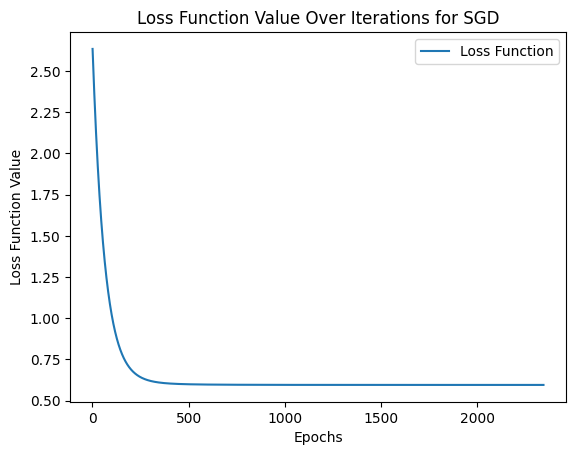

In [29]:
x_plot_sgd = np.linspace(1, len(loss_list_sgd[1:]), len(loss_list_sgd[1:]))
plt.plot(x_plot_sgd, loss_list_sgd[1:], label='Loss Function')
plt.xlabel('Epochs')
plt.ylabel('Loss Function Value')
plt.title('Loss Function Value Over Iterations for SGD')
plt.legend()
plt.show()

Plotting the loss for first 15 values of epoch.

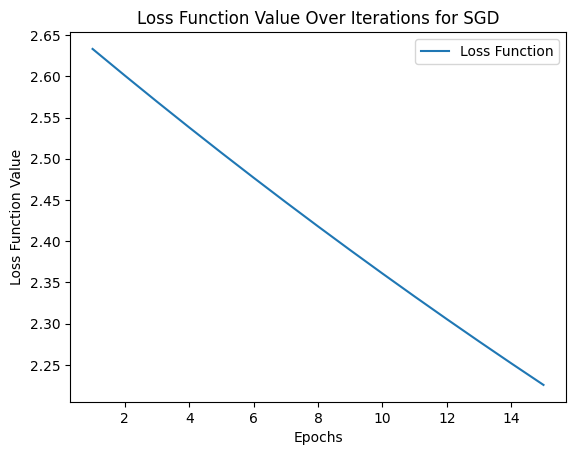

In [30]:
x_plot_sgd = np.linspace(1, len(loss_list_sgd[1:16]), len(loss_list_sgd[1:16]))
plt.plot(x_plot_sgd, loss_list_sgd[1:16], label='Loss Function')
plt.xlabel('Epochs')
plt.ylabel('Loss Function Value')
plt.title('Loss Function Value Over Iterations for SGD')
plt.legend()
plt.show()

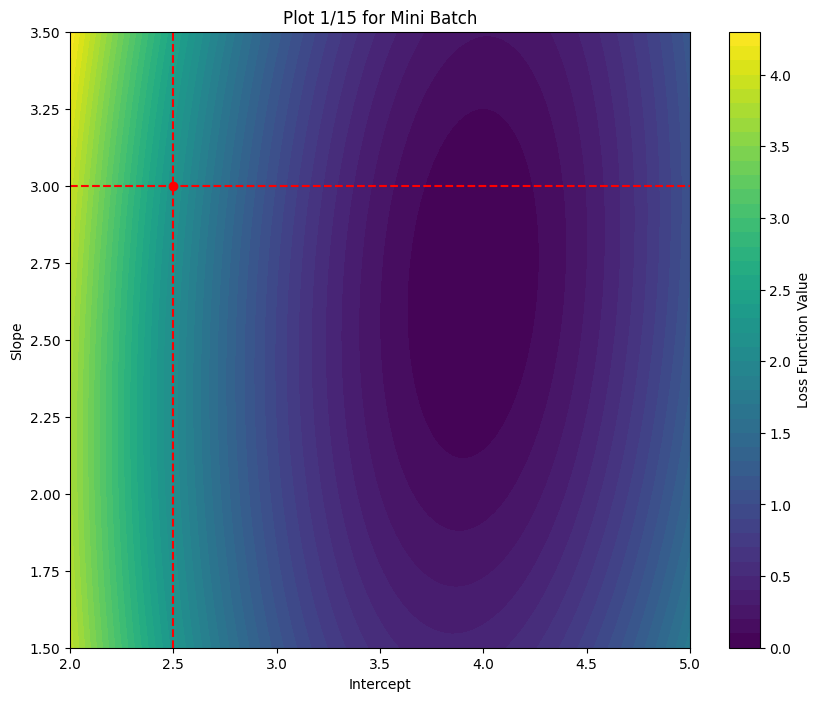

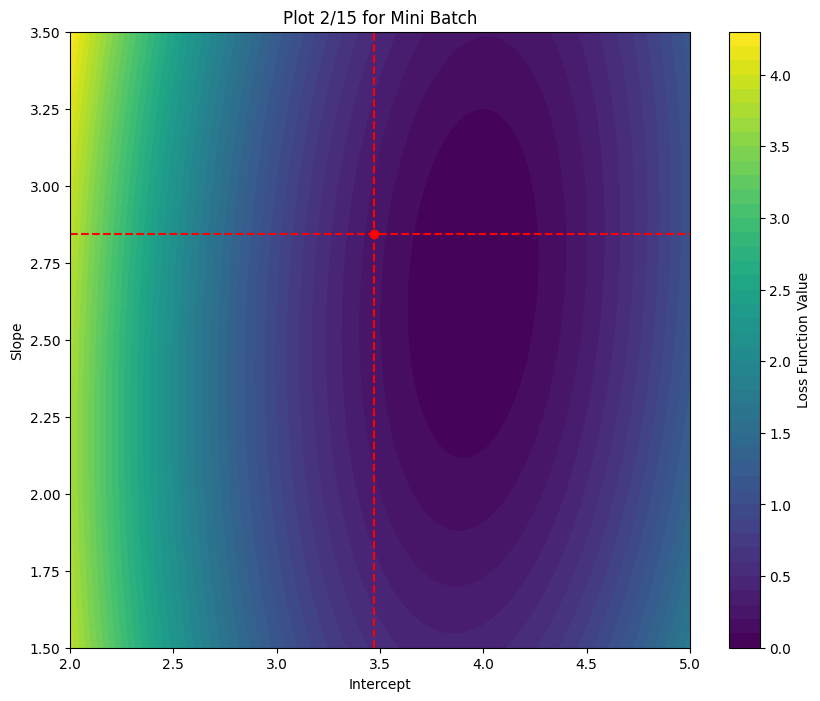

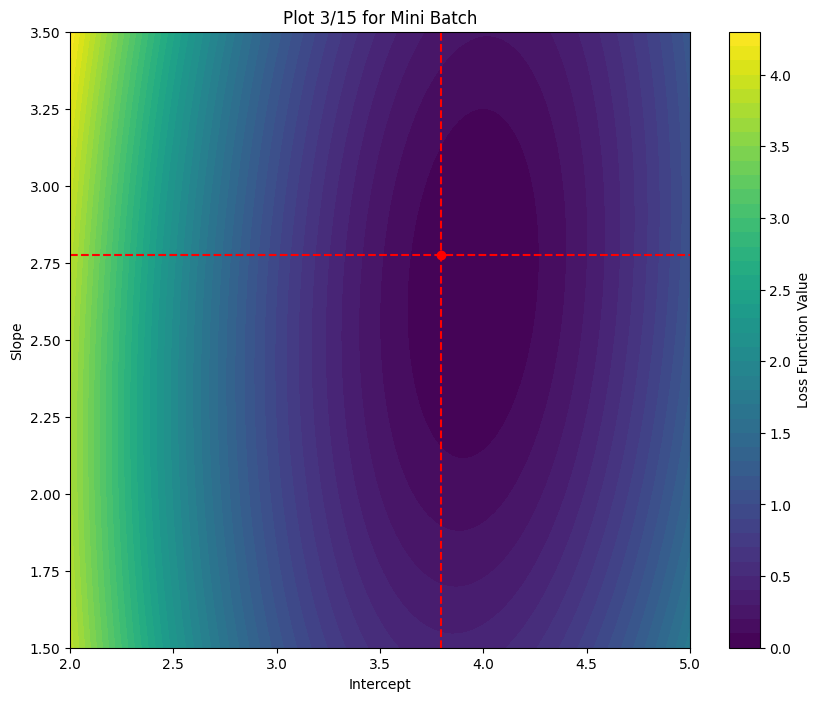

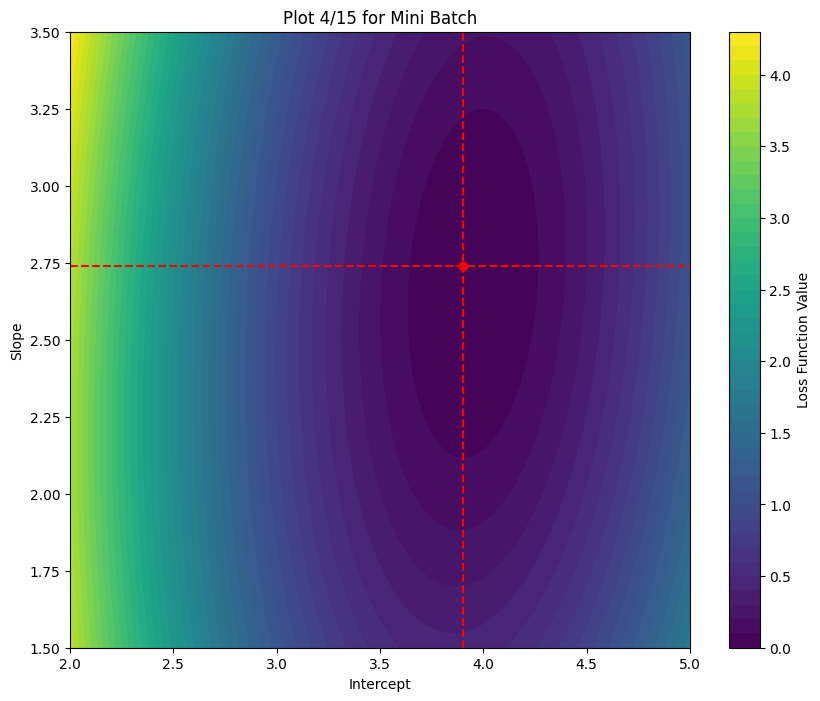

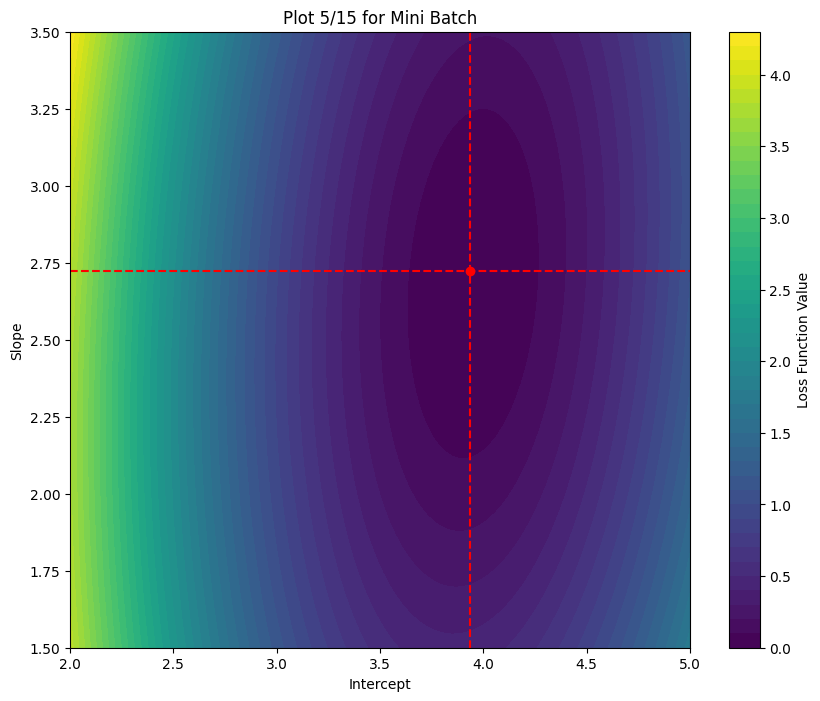

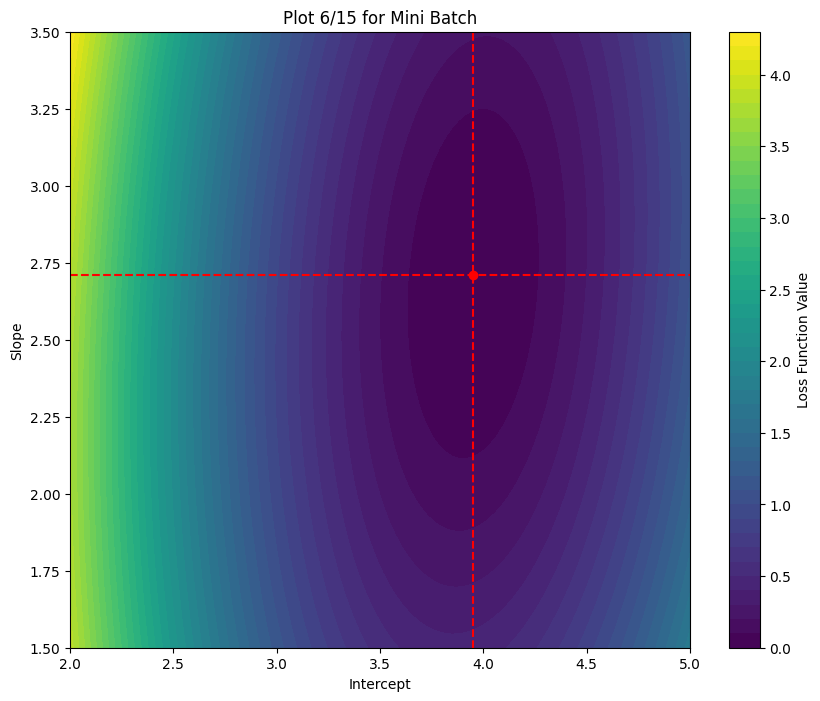

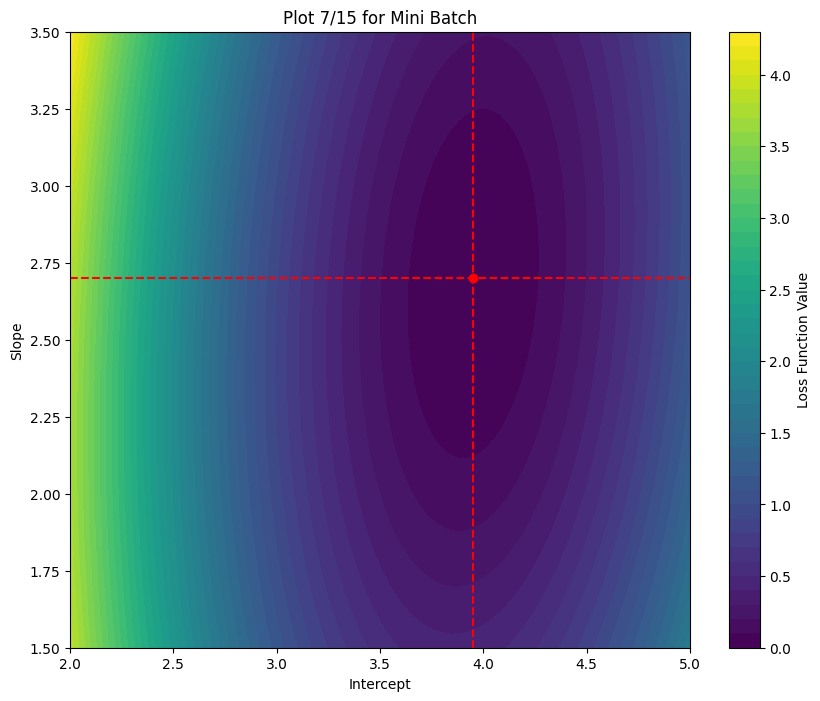

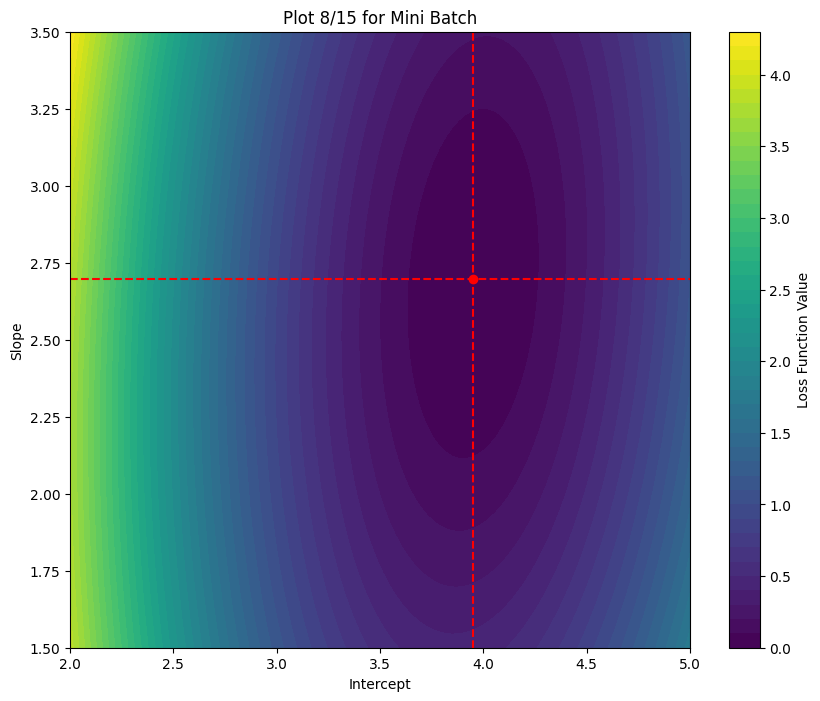

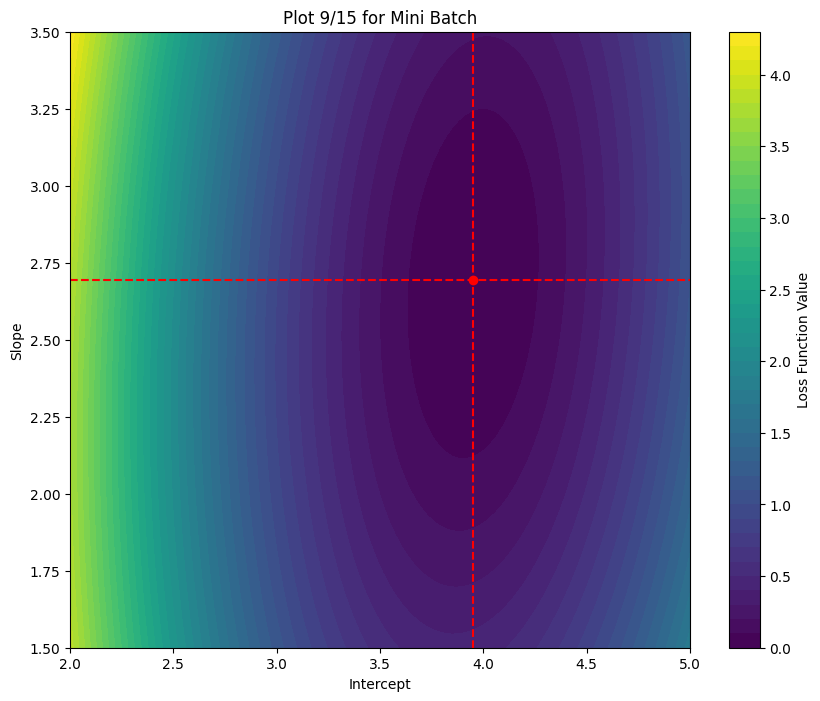

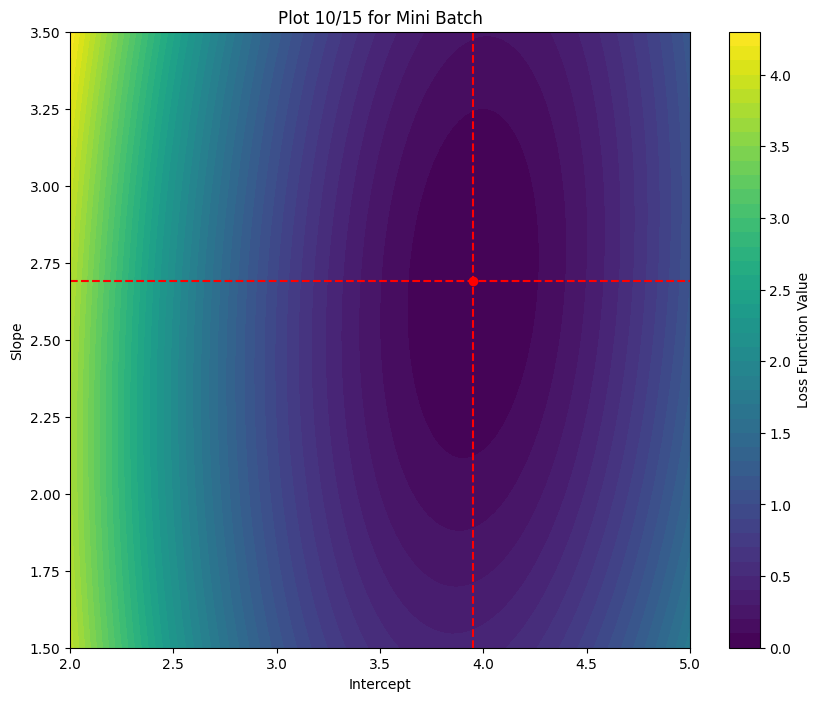

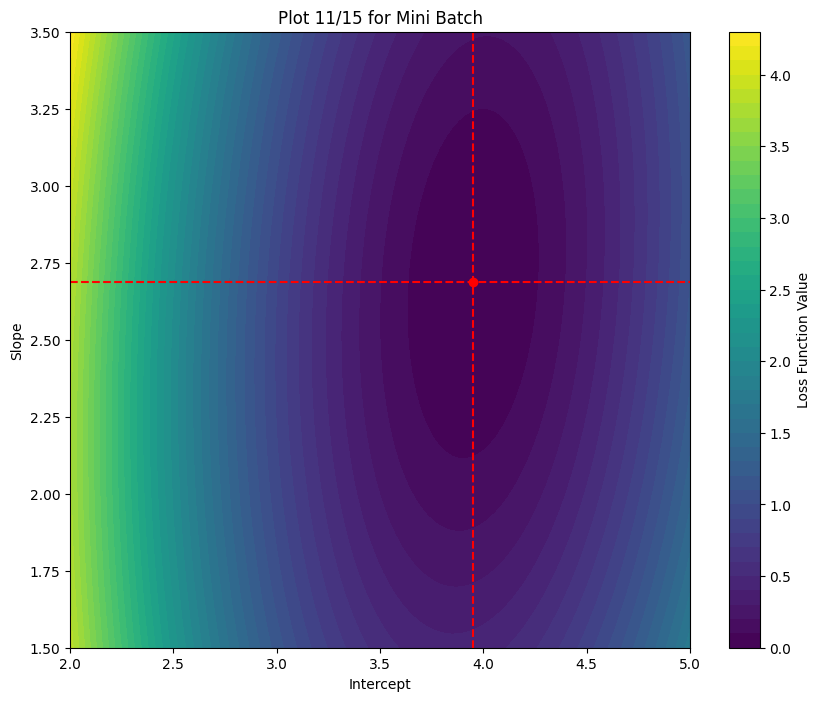

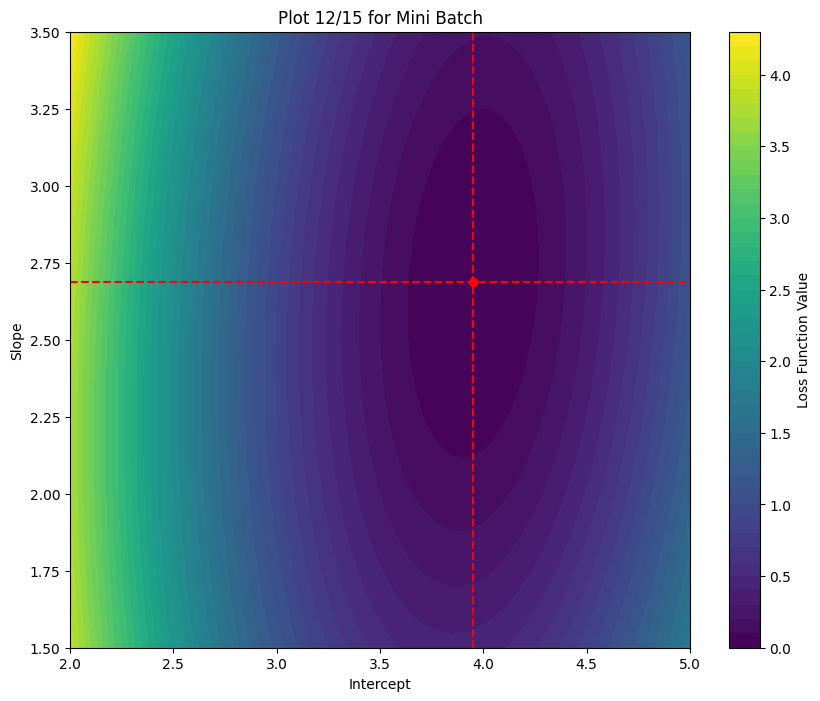

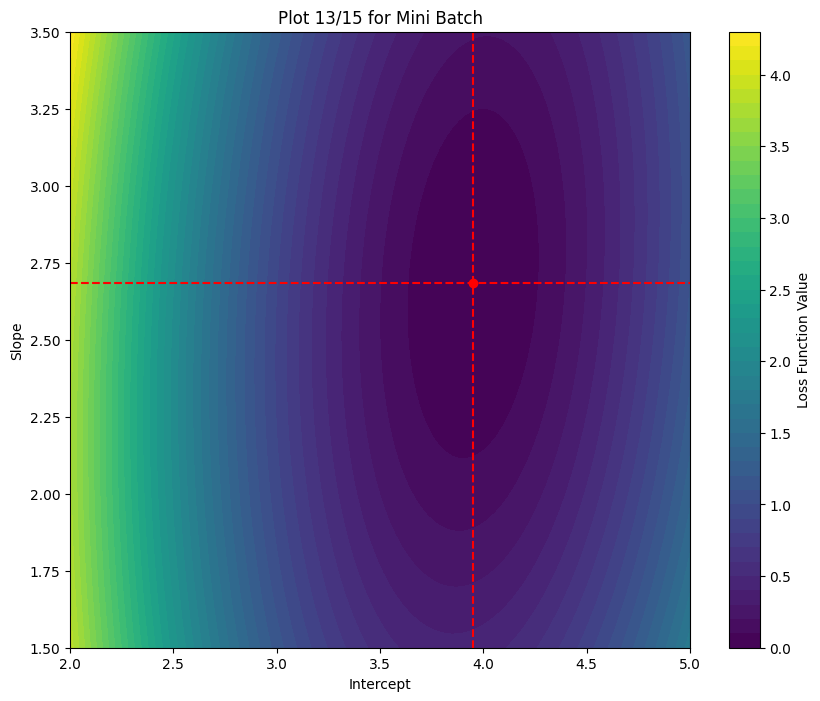

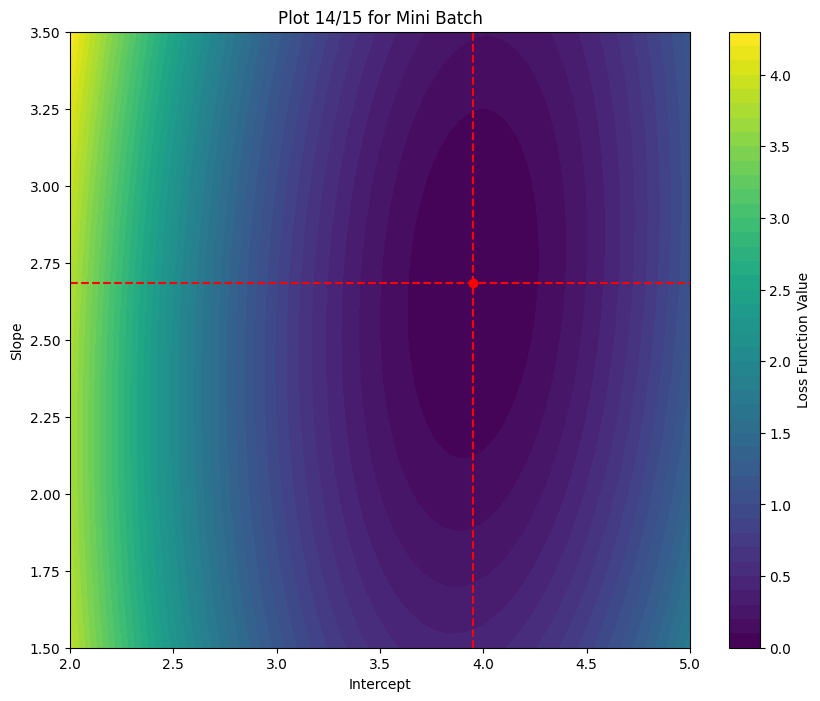

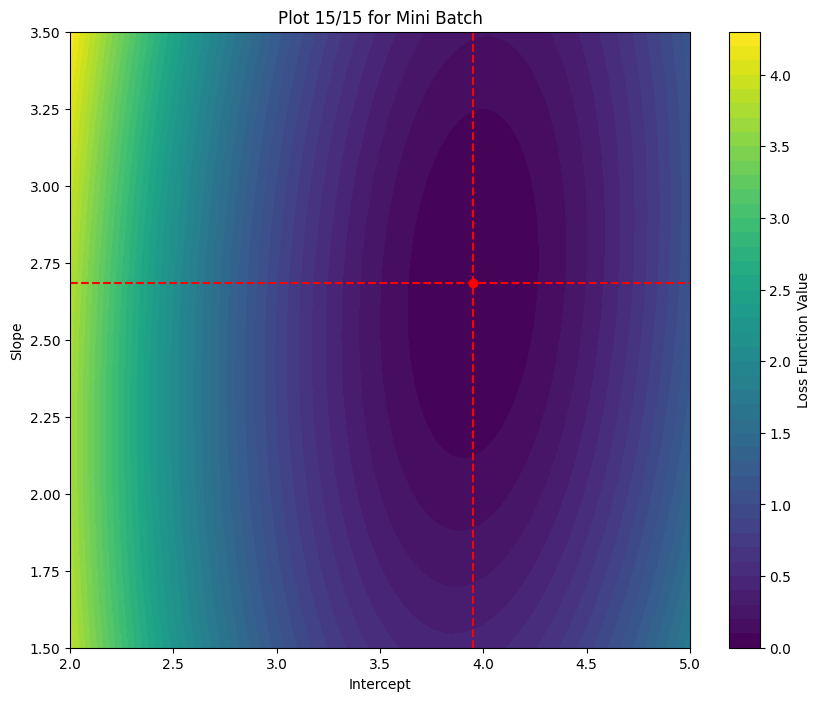

In [31]:
csv_file_path = 'processed_data_mini_batch.csv'
df_csv = pd.read_csv(csv_file_path)


theta0_list = df_csv['val_theta0'].values
theta1_list = df_csv['val_theta1'].values


iterations = 15
len_data = len(theta0_list)
val_skip = len_data // iterations

theta0_vals = []
theta1_vals = []

for a in range(iterations):

    plt.figure(figsize=(10, 8))
    contour = plt.contourf(INTERCEPT, slope, loss_grid, levels=50, cmap='viridis')
    plt.colorbar(contour, label='Loss Function Value')
    plt.xlabel('Intercept')
    plt.ylabel('Slope')
    plt.title('Contour Plot of difference of Loss Function')

    theta0 = theta0_list[a*val_skip]
    theta1 = theta1_list[a*val_skip]

    theta0_vals.append(theta0)
    theta1_vals.append(theta1)

    plt.plot(theta0, theta1, 'ro')
    plt.title(f'Plot {a+1}/{iterations} for Mini Batch')


    plt.axhline(y=theta1, color='red', linestyle='--')
    plt.axvline(x=theta0, color='red', linestyle='--')

    display(plt.gcf())
    clear_output(wait=True)
    time.sleep(0.4)

plt.show()

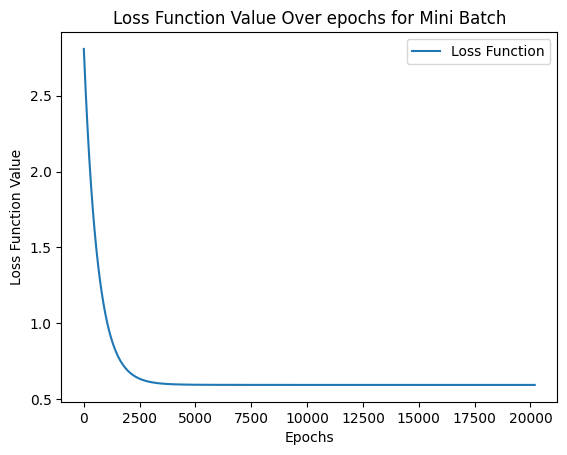

In [32]:
loss_list = df_csv['loss_values_mini_batch'].values
x_plot_mini_batch = np.linspace(1, len(loss_list[1:]), len(loss_list[1:]))
plt.plot(x_plot_mini_batch, loss_list[1:], label='Loss Function')
plt.xlabel('Epochs')
plt.ylabel('Loss Function Value')
plt.title('Loss Function Value Over epochs for Mini Batch')
plt.legend()
plt.show()


Plotting the loss for first 15 values of epoch.

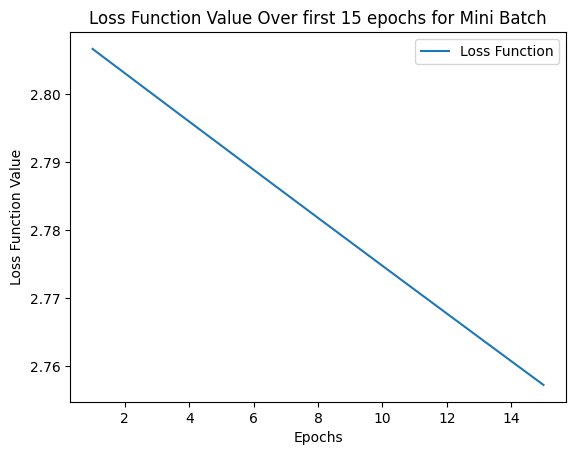

In [33]:
loss_list = df_csv['loss_values_mini_batch'].values
x_plot_mini_batch = np.linspace(1, len(loss_list[1:16]), len(loss_list[1:16]))
plt.plot(x_plot_mini_batch, loss_list[1:16], label='Loss Function')
plt.xlabel('Epochs')
plt.ylabel('Loss Function Value')
plt.title('Loss Function Value Over first 15 epochs for Mini Batch')
plt.legend()
plt.show()


Code for animation

In [38]:
iterations = 200
len_data = len(theta0_list)
val_skip = len_data // iterations

theta0_vals = []
theta1_vals = []

save_dir = '/Users/tejasmacipad/Desktop/Second_yr/Machine_Learning/es335-24-fall-assignment-2/Plot_figures/PLOT_MBNM'

for a in range(iterations):
    plt.figure(figsize=(10, 8))
    contour = plt.contourf(INTERCEPT, slope, loss_grid, levels=50, cmap='viridis')
    plt.colorbar(contour, label='Loss Function Value')
    plt.xlabel('Intercept')
    plt.ylabel('Slope')
    plt.title('Contour Plot of difference of Loss Function')

    theta0 = theta0_list[a * val_skip]
    theta1 = theta1_list[a * val_skip]

    theta0_vals.append(theta0)
    theta1_vals.append(theta1)

    plt.plot(theta0, theta1, 'ro')
    plt.title(f'Plot {a + 1}/{iterations} for Mini Batch')

    plt.axhline(y=theta1, color='red', linestyle='--')
    plt.axvline(x=theta0, color='red', linestyle='--')

    image_path = os.path.join(save_dir, f'plot_mini_batch_{a + 1}.png')
    plt.savefig(image_path)

    plt.close()

print(f'All Mini Batch plots saved to {save_dir}')

All Mini Batch plots saved to /Users/tejasmacipad/Desktop/Second_yr/Machine_Learning/es335-24-fall-assignment-2/Plot_figures/PLOT_SGNM
